**Week 2 Project Assignment** 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import requests # library to handle requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\Program_D\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


**Introduction of Business case**

James, an experienced pilot and popular chef on Youtube. He has been made redundant recently due to covid-19 pandanmic. 
He is certainly wealthy at this stage. Though losing his pilot job would give him more time to produce more videos on Youtube, however he wants to do something concrete and serve his audience in person with his food. So now James has an idea, which is to make use of his popularity on Youtube for his new restaurant. He believes his new restaurant can draw attentions by his food and popularity

**Problem:**
To satisfy his needs, he has to determine which town in Hong Kong is surrounded by crowd and type of restaurant which easily gets popular. Thus, the selection criteria can be measured by the following
1. Location: total population and population density of Districts in Hong Kong
2. Type of popular restaurants in selected District : The type of restaurant which is registered with high volume of total ratings and tips from Foursquare

**Data requirements:**

1. List of towns in HK as well as the data pertaining to Latitude/Longitude
2. Population of District
3. List of restaurants in the selected District and the data pertaining to volume of ratings and tips

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_Hong_Kong', header=0)
dfs

[Empty DataFrame
 Columns: [Unnamed: 0, This article does not cite any sources. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "List of towns in Hong Kong" – news · newspapers · books · scholar · JSTOR (July 2016) (Learn how and when to remove this template message)]
 Index: [],
                               Geography of Hong Kong
 0  Amusement parks Areas (Neighbourhoods) Bays Be...
 1                             Other Hong Kong topics
 2  Culture Economy Education History Politics Hon...,
                       Settlement  \
 0                  Victoria City   
 1  Kowloon including New Kowloon   
 
                                             Location  
 0  part of Central and Western, part of Wan Chai ...  
 1  Yau Tsim Mong, Sham Shui Po, Kowloon City, Won...  ,
                                            Cities                  District  \
 0  Tsuen Wan (Tsuen Wan, Kwai Chung and Tsing Yi) 

In [3]:
dfs[4]

,Towns,Location
0,Aberdeen,Southern
1,Cheung Chau,Islands
2,Discovery Bay,Islands
3,Jardine's Lookout,Wan Chai
4,Ha Tsuen,Yuen Long
5,Kam Tin,Yuen Long
6,Kwun Tong,Kwun Tong
7,Kwu Tung,North
8,Lau Fau Shan,Tuen Mun
9,Lei Yue Mun,Kwun Tong


In [109]:
hk_town = dfs[4]
hk_town.head()

,Towns,Location
0,Aberdeen,Southern
1,Cheung Chau,Islands
2,Discovery Bay,Islands
3,Jardine's Lookout,Wan Chai
4,Ha Tsuen,Yuen Long


In [5]:
hk_town.shape

(25, 2)

*Both Mui Wo (Silvermine Bay) and Yuen Long Town are renamed to avoid error*

In [7]:
hk_town.iloc[23,0] = 'Yuen Long'
hk_town.iloc[12,0] = 'Mui Wo'
hk_town.shape

(25, 2)

In [8]:
hk_town.reset_index(drop=True)

,Towns,Location
0,Aberdeen,Southern
1,Cheung Chau,Islands
2,Discovery Bay,Islands
3,Jardine's Lookout,Wan Chai
4,Ha Tsuen,Yuen Long
5,Kam Tin,Yuen Long
6,Kwun Tong,Kwun Tong
7,Kwu Tung,North
8,Lau Fau Shan,Tuen Mun
9,Lei Yue Mun,Kwun Tong


In [9]:
hk_town = hk_town.rename(columns = {'Location':'District'})
hk_town.head()

,Towns,District
0,Aberdeen,Southern
1,Cheung Chau,Islands
2,Discovery Bay,Islands
3,Jardine's Lookout,Wan Chai
4,Ha Tsuen,Yuen Long


In [10]:
column_names = ['Towns','District','Latitude', 'Longitude']
df = pd.DataFrame(columns=column_names)
df

,Towns,District,Latitude,Longitude


In [11]:
len(hk_town)

25

In [12]:
for i in range(len(hk_town)):
    address = hk_town.iloc[i,0] + ', Hong Kong'
    geolocator = Nominatim(user_agent="hk_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df = df.append({'Towns':hk_town.iloc[i,0],'District':hk_town.iloc[i,1],'Latitude':latitude,'Longitude':longitude}, ignore_index=True)
df

,Towns,District,Latitude,Longitude
0,Aberdeen,Southern,22.248769,114.155954
1,Cheung Chau,Islands,22.209614,114.029637
2,Discovery Bay,Islands,22.297369,114.016528
3,Jardine's Lookout,Wan Chai,22.266356,114.198333
4,Ha Tsuen,Yuen Long,22.445878,113.994269
5,Kam Tin,Yuen Long,22.439271,114.065490
6,Kwun Tong,Kwun Tong,22.312937,114.225610
7,Kwu Tung,North,22.504271,114.102845
8,Lau Fau Shan,Tuen Mun,22.467372,113.984152
9,Lei Yue Mun,Kwun Tong,22.288695,114.238645


In [13]:
hk_town_geodata = df
hk_town_geodata.head()

,Towns,District,Latitude,Longitude
0,Aberdeen,Southern,22.248769,114.155954
1,Cheung Chau,Islands,22.209614,114.029637
2,Discovery Bay,Islands,22.297369,114.016528
3,Jardine's Lookout,Wan Chai,22.266356,114.198333
4,Ha Tsuen,Yuen Long,22.445878,113.994269


In [14]:
df_hk_districts = hk_town_geodata.groupby('District').size().reset_index(name='counts')
df_hk_districts

,District,counts
0,Islands,8
1,Kwun Tong,2
2,North,3
3,Sai Kung,1
4,Southern,3
5,Tsuen Wan,1
6,Tuen Mun,1
7,Wan Chai,1
8,Yuen Long,5


In [15]:
dfs_districts = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong', header=0)
dfs_districts

[  Districts of Hong Kong.mw-parser-output .nobold{font-weight:normal}香港地區  \
 0  1. Islands 2. Kwai Tsing 3. North 4. Sai Kung ...                        
 1  1. Islands 2. Kwai Tsing 3. North 4. Sai Kung ...                        
 2                                           Category                        
 3                                           Location                        
 4                                             Number                        
 5                                        Populations                        
 6                                              Areas                        
 7                                         Government                        
 8                                       Subdivisions                        
 
   Districts of Hong Kong.mw-parser-output .nobold{font-weight:normal}香港地區.1  
 0  1. Islands 2. Kwai Tsing 3. North 4. Sai Kung ...                         
 1                                                NaN       

In [16]:
dfs_districts[5].head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6]
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391
1,Eastern,東區,555034,Cape Verde,-2.8%,30861
2,Southern,南區,274994,French Guiana (France),-0.6%,7080
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691


In [17]:
dfs_districts = dfs_districts[5]

In [18]:
dfs_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6]
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391
1,Eastern,東區,555034,Cape Verde,-2.8%,30861
2,Southern,南區,274994,French Guiana (France),-0.6%,7080
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691


In [19]:
dfs_districts = dfs_districts.rename(columns={'Population (2016)[6]': 'Population', 'Density(/km2)[6]':'Population Density'})
dfs_districts.head()

,District,Chinese,Population,Comparable Territory (2018)[7],Population Growth (From 2006)[6],Population Density
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391
1,Eastern,東區,555034,Cape Verde,-2.8%,30861
2,Southern,南區,274994,French Guiana (France),-0.6%,7080
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691


In [110]:
dfs_districts = dfs_districts[['District','Population','Population Density']]
dfs_districts.head()

,District,Population,Population Density
0,Central and Western,243266,19391
1,Eastern,555034,30861
2,Southern,274994,7080
3,Wan Chai,180123,17137
4,Hong Kong Island Subtotal,1253417,15691


In [ ]:
#To populate List of district with population and population density

In [21]:
merged_df_districts = df_hk_districts.merge(dfs_districts, how = 'inner', on = ['District'])

In [22]:
merged_df_districts

,District,counts,Population,Population Density
0,Islands,8,156801,886
1,Kwun Tong,2,648541,57530
2,North,3,315270,2310
3,Sai Kung,1,461864,3563
4,Southern,3,274994,7080
5,Tsuen Wan,1,318916,5149
6,Tuen Mun,1,489299,5894
7,Wan Chai,1,180123,17137
8,Yuen Long,5,607200,4435


District of Kwun Tong and Yuen Long have the highest population, and Kwun Tong outshine Yuen Long in terms of Population Density which is a crucial factor for James's restaurant to boost up popularity. Lets pick Kwun Tong for this analysis

In [25]:
kwun_tong_geodata = hk_town_geodata[hk_town_geodata['District'].str.contains('Kwun Tong')]
kwun_tong_geodata

,Towns,District,Latitude,Longitude
6,Kwun Tong,Kwun Tong,22.312937,114.225610
9,Lei Yue Mun,Kwun Tong,22.288695,114.238645


In Kwun Tong, there is two towns. 

In [107]:
# create map of Manhattan using latitude and longitude values
map_kwuntong = folium.Map(location=[kwun_tong_geodata.iloc[0,2], kwun_tong_geodata.iloc[0,3]], zoom_start=13)

# add markers to map
for lat, lng, label in zip(kwun_tong_geodata['Latitude'], kwun_tong_geodata['Longitude'], kwun_tong_geodata['Towns']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kwuntong)  
    
map_kwuntong

As you can see, Kwun Tong Town is actually surrounded by plenty of buidlings which are mixture of high density commercial and residential buildings. Both type of buildings are definitely good supply of crowds and popularity for James's restaurant. Lets pick and explore the restaurant around Kwun Tong

In [27]:
CLIENT_ID = 'M2MDRPYYP4AAI1HQ1JHVGGT3W2XJINRB114WETGNF1IRPSV3' # your Foursquare ID
CLIENT_SECRET = 'XFMM30KSXOMSBRJRCHDSUSD3K1SPQKEGVWQP2F5BZWUUFDNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M2MDRPYYP4AAI1HQ1JHVGGT3W2XJINRB114WETGNF1IRPSV3
CLIENT_SECRET:XFMM30KSXOMSBRJRCHDSUSD3K1SPQKEGVWQP2F5BZWUUFDNO


**EXPLORATION ON KWUN TONG - KWUN TONG**

Lets begin to explore the restaurants around Kwun Tong town centre

In [28]:
#Kwun Tong lat & long
latitude_kt= 22.312937
longitude_kt=114.225610
search_query = 'Restaurant'
radius = 400
print(search_query + ' .... OK!')

Restaurant .... OK!


In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_kt, longitude_kt, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=M2MDRPYYP4AAI1HQ1JHVGGT3W2XJINRB114WETGNF1IRPSV3&client_secret=XFMM30KSXOMSBRJRCHDSUSD3K1SPQKEGVWQP2F5BZWUUFDNO&ll=22.312937,114.22561&v=20180605&query=Restaurant&radius=400&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fa621f4a6646a5e760fbc05'},
 'response': {'venues': [{'id': '4b973158f964a520a8fb34e3',
    'name': 'Lei Garden Restaurant (利苑酒家)',
    'location': {'address': 'Shop L5-8, APM (Millennium City 5), 418 Kwun Tong Rd',
     'lat': 22.31291147173667,
     'lng': 114.22537080199736,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.31291147173667,
       'lng': 114.22537080199736}],
     'distance': 24,
     'cc': 'HK',
     'city': '观塘',
     'country': '香港',
     'formattedAddress': ['Shop L5-8, APM (Millennium City 5), 418 Kwun Tong Rd',
      '香港']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1604723188',
    'hasPerk': False},
   {'id': '588f20f55490d32cb9ed7e6c',
    'na

In [31]:
venues_kt = results['response']['venues']

# tranform venues into a dataframe
dataframe_kt = json_normalize(venues_kt)
dataframe_kt.head()

D:\Program_D\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.country,location.formattedAddress,location.state,location.neighborhood,location.crossStreet
0,4b973158f964a520a8fb34e3,Lei Garden Restaurant (利苑酒家),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1604723188,False,"Shop L5-8, APM (Millennium City 5), 418 Kwun T...",22.312911,114.225371,"[{'label': 'display', 'lat': 22.31291147173667...",24,HK,观塘,香港,"[Shop L5-8, APM (Millennium City 5), 418 Kwun ...",NaN,NaN,NaN
1,588f20f55490d32cb9ed7e6c,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),"[{'id': '52e81612bcbc57f1066b79f4', 'name': 'B...",v-1604723188,False,"5/F, One Pacific Centre, 414 Kwun Tong Road",22.312678,114.224551,"[{'label': 'display', 'lat': 22.312678, 'lng':...",112,HK,观塘,香港,"[5/F, One Pacific Centre, 414 Kwun Tong Road, 香港]",NaN,NaN,NaN
2,59009570002f4c1902f8e032,Victoria Harbour Restaurant (海港酒家),"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1604723188,False,"7/F, One Pacific Centre, 414 Kwun Tong Rd",22.312825,114.224609,"[{'label': 'display', 'lat': 22.312825, 'lng':...",103,HK,Kwun Tong,香港,"[7/F, One Pacific Centre, 414 Kwun Tong Rd, Ko...",Kowloon,NaN,NaN
3,548a7a48498e858c533c63e0,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1604723188,False,"Shop U, 3/F., Camel Paint Building Block 3, 60...",22.312882,114.225098,"[{'label': 'display', 'lat': 22.31288214132751...",53,HK,观塘,香港,"[Shop U, 3/F., Camel Paint Building Block 3, 6...",NaN,NaN,NaN
4,5d43bb55a92e2b00083bf346,JJ Market Thai Restaurant (翟道翟),"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1604723188,False,"Room C, 1/F, Howard Factory Building, 104 How ...",22.312109,114.223650,"[{'label': 'display', 'lat': 22.312109, 'lng':...",221,HK,观塘,香港,"[Room C, 1/F, Howard Factory Building, 104 How...",NaN,Kwun Tong,NaN


In [32]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_kt.columns if col.startswith('location.')] + ['id']
dataframe_kt_filtered = dataframe_kt.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_kt_filtered['categories'] = dataframe_kt_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_kt_filtered.columns = [column.split('.')[-1] for column in dataframe_kt_filtered.columns]

dataframe_kt_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,state,neighborhood,crossStreet,id
0,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,"Shop L5-8, APM (Millennium City 5), 418 Kwun T...",22.312911,114.225371,"[{'label': 'display', 'lat': 22.31291147173667...",24,HK,观塘,香港,"[Shop L5-8, APM (Millennium City 5), 418 Kwun ...",NaN,NaN,NaN,4b973158f964a520a8fb34e3
1,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),Buffet,"5/F, One Pacific Centre, 414 Kwun Tong Road",22.312678,114.224551,"[{'label': 'display', 'lat': 22.312678, 'lng':...",112,HK,观塘,香港,"[5/F, One Pacific Centre, 414 Kwun Tong Road, 香港]",NaN,NaN,NaN,588f20f55490d32cb9ed7e6c
2,Victoria Harbour Restaurant (海港酒家),Dim Sum Restaurant,"7/F, One Pacific Centre, 414 Kwun Tong Rd",22.312825,114.224609,"[{'label': 'display', 'lat': 22.312825, 'lng':...",103,HK,Kwun Tong,香港,"[7/F, One Pacific Centre, 414 Kwun Tong Rd, Ko...",Kowloon,NaN,NaN,59009570002f4c1902f8e032
3,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),Korean Restaurant,"Shop U, 3/F., Camel Paint Building Block 3, 60...",22.312882,114.225098,"[{'label': 'display', 'lat': 22.31288214132751...",53,HK,观塘,香港,"[Shop U, 3/F., Camel Paint Building Block 3, 6...",NaN,NaN,NaN,548a7a48498e858c533c63e0
4,JJ Market Thai Restaurant (翟道翟),Thai Restaurant,"Room C, 1/F, Howard Factory Building, 104 How ...",22.312109,114.223650,"[{'label': 'display', 'lat': 22.312109, 'lng':...",221,HK,观塘,香港,"[Room C, 1/F, Howard Factory Building, 104 How...",NaN,Kwun Tong,NaN,5d43bb55a92e2b00083bf346
5,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,Vietnamese Restaurant,"Shop A, G/F, Good Year Industrial Building, 11...",22.311712,114.224160,"[{'label': 'display', 'lat': 22.311712, 'lng':...",202,HK,Kwun Tong,香港,"[Shop A, G/F, Good Year Industrial Building, 1...",Kowloon,Kwun Tong,NaN,5cb414bb4aa3f8002ccb65da
6,Sweetheart Garden Restaurant (花園餐廳),Steakhouse,"Unit 241, 2/F, E-Plaza, 7 Shing Yip St",22.310701,114.225920,"[{'label': 'display', 'lat': 22.31070124168523...",250,HK,观塘,香港,"[Unit 241, 2/F, E-Plaza, 7 Shing Yip St, 香港]",NaN,NaN,NaN,4ccbc685ba79a1cd24c536cb
7,The Graces Restaurant (玉桃軒),Cantonese Restaurant,"6/F, Crocodile Centre, 79 Hoi Yuen Rd",22.311986,114.226131,"[{'label': 'display', 'lat': 22.31198590850034...",118,HK,观塘,香港,"[6/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]",NaN,Kwun Tong,NaN,4bff554b369476b0fabc8d1f
8,Cheung Lung Restaurant (翔龍拉麵小籠包),Dumpling Restaurant,"Shop 301, 3/F, One Pacific Centre, 414 Kwun To...",22.312852,114.224678,"[{'label': 'display', 'lat': 22.31285197008846...",96,HK,观塘,香港,"[Shop 301, 3/F, One Pacific Centre, 414 Kwun T...",NaN,NaN,NaN,517e6037e4b0347e2dfebf40
9,Gozen Edo Japanese Restaurant (御前大江戶日式料理),Sushi Restaurant,"8/F, One Pacific Centre, 414 Kwun Tong Rd",22.312834,114.224634,"[{'label': 'display', 'lat': 22.31283402533230...",101,HK,观塘,香港,"[8/F, One Pacific Centre, 414 Kwun Tong Rd, 香港]",NaN,Kwun Tong,NaN,563b3441cd10cb553e868882


In [33]:
dataframe_kt_filtered.shape

(50, 15)

There are 50 restaurants listed out by Foursquare

In [34]:
#standardise the name of city
dataframe_kt_filtered['city'] = 'Kwun Tong'

Lets retrieve the Ratings and Tips count of each restaurant

In [35]:
col_names = ['id','Ratings','Tips_count']

In [36]:
df_rating_tips=pd.DataFrame(columns=col_names)
df_rating_tips

,id,Ratings,Tips_count


In [37]:
for j in range(49):
    venue_id = dataframe_kt_filtered.iloc[j,-1] # ID 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    tips_count = result['response']['venue']['tips']['count']
    try:
        rating = result['response']['venue']['rating']
    except: 
        rating = 0
        df_rating_tips = df_rating_tips.append({'id':venue_id, 'Ratings': rating,'Tips_count':tips_count}, ignore_index=True)

In [38]:
dataframe_kt_filtered = dataframe_kt_filtered.merge(df_rating_tips, how = 'inner', on = ['id'])
dataframe_kt_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,state,neighborhood,crossStreet,id,Ratings,Tips_count
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),Buffet,"5/F, One Pacific Centre, 414 Kwun Tong Road",22.312678,114.224551,"[{'label': 'display', 'lat': 22.312678, 'lng':...",112,HK,Kwun Tong,香港,"[5/F, One Pacific Centre, 414 Kwun Tong Road, 香港]",NaN,NaN,NaN,588f20f55490d32cb9ed7e6c,0,0
1,Victoria Harbour Restaurant (海港酒家),Dim Sum Restaurant,"7/F, One Pacific Centre, 414 Kwun Tong Rd",22.312825,114.224609,"[{'label': 'display', 'lat': 22.312825, 'lng':...",103,HK,Kwun Tong,香港,"[7/F, One Pacific Centre, 414 Kwun Tong Rd, Ko...",Kowloon,NaN,NaN,59009570002f4c1902f8e032,0,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),Korean Restaurant,"Shop U, 3/F., Camel Paint Building Block 3, 60...",22.312882,114.225098,"[{'label': 'display', 'lat': 22.31288214132751...",53,HK,Kwun Tong,香港,"[Shop U, 3/F., Camel Paint Building Block 3, 6...",NaN,NaN,NaN,548a7a48498e858c533c63e0,0,0
3,JJ Market Thai Restaurant (翟道翟),Thai Restaurant,"Room C, 1/F, Howard Factory Building, 104 How ...",22.312109,114.223650,"[{'label': 'display', 'lat': 22.312109, 'lng':...",221,HK,Kwun Tong,香港,"[Room C, 1/F, Howard Factory Building, 104 How...",NaN,Kwun Tong,NaN,5d43bb55a92e2b00083bf346,0,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,Vietnamese Restaurant,"Shop A, G/F, Good Year Industrial Building, 11...",22.311712,114.224160,"[{'label': 'display', 'lat': 22.311712, 'lng':...",202,HK,Kwun Tong,香港,"[Shop A, G/F, Good Year Industrial Building, 1...",Kowloon,Kwun Tong,NaN,5cb414bb4aa3f8002ccb65da,0,0
5,The Graces Restaurant (玉桃軒),Cantonese Restaurant,"6/F, Crocodile Centre, 79 Hoi Yuen Rd",22.311986,114.226131,"[{'label': 'display', 'lat': 22.31198590850034...",118,HK,Kwun Tong,香港,"[6/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]",NaN,Kwun Tong,NaN,4bff554b369476b0fabc8d1f,0,1
6,Gozen Edo Japanese Restaurant (御前大江戶日式料理),Sushi Restaurant,"8/F, One Pacific Centre, 414 Kwun Tong Rd",22.312834,114.224634,"[{'label': 'display', 'lat': 22.31283402533230...",101,HK,Kwun Tong,香港,"[8/F, One Pacific Centre, 414 Kwun Tong Rd, 香港]",NaN,Kwun Tong,NaN,563b3441cd10cb553e868882,0,1
7,Daimanya Japanese Restaurant (大滿屋日本料理),Japanese Restaurant,"10/F, One Pacific Centre, 414 Kwun Tong Rd",22.312954,114.224390,"[{'label': 'display', 'lat': 22.31295427683909...",125,HK,Kwun Tong,香港,"[10/F, One Pacific Centre, 414 Kwun Tong Rd, K...",Kowloon,Kwun Tong,NaN,56271c34498e5e4cb0638405,0,0
8,Chill Kwun Chinese Restaurant (朝群粵菜餐廳),Cantonese Restaurant,"Shop D, 2/F, COS Centre, 56 Tsun Yip Street, K...",22.311757,114.222822,"[{'label': 'display', 'lat': 22.311757, 'lng':...",315,HK,Kwun Tong,香港,"[Shop D, 2/F, COS Centre, 56 Tsun Yip Street, ...",Kowloon,NaN,NaN,5e6acf25e87b2900079581b5,0,0
9,Asahiya Japanese Restaurant (朝日屋),Japanese Restaurant,"Shop C, 2/F, COS Centre, 56 Tsun Yip St",22.311859,114.222584,"[{'label': 'display', 'lat': 22.311859, 'lng':...",333,HK,Kwun Tong,香港,"[Shop C, 2/F, COS Centre, 56 Tsun Yip St, 香港]",NaN,NaN,NaN,5b51630d037be10033049841,0,0


In [39]:
dataframe_kt_filtered = dataframe_kt_filtered[['name','id','lat','lng','city','categories','Ratings','Tips_count']]

In [40]:
dataframe_kt_filtered.head()

,name,id,lat,lng,city,categories,Ratings,Tips_count
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,Buffet,0,0
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,Dim Sum Restaurant,0,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,Korean Restaurant,0,0
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,Thai Restaurant,0,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,Vietnamese Restaurant,0,0


Since quite a number of restaurants are lack of Tips count, lets add 1 count to each restaurant

In [41]:
dataframe_kt_filtered['Tips_count'] = dataframe_kt_filtered['Tips_count'] + 1

D:\Program_D\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
dataframe_kt_filtered

,name,id,lat,lng,city,categories,Ratings,Tips_count
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,Buffet,0,1
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,Dim Sum Restaurant,0,1
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,Korean Restaurant,0,1
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,Thai Restaurant,0,1
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,Vietnamese Restaurant,0,1
5,The Graces Restaurant (玉桃軒),4bff554b369476b0fabc8d1f,22.311986,114.226131,Kwun Tong,Cantonese Restaurant,0,2
6,Gozen Edo Japanese Restaurant (御前大江戶日式料理),563b3441cd10cb553e868882,22.312834,114.224634,Kwun Tong,Sushi Restaurant,0,2
7,Daimanya Japanese Restaurant (大滿屋日本料理),56271c34498e5e4cb0638405,22.312954,114.224390,Kwun Tong,Japanese Restaurant,0,1
8,Chill Kwun Chinese Restaurant (朝群粵菜餐廳),5e6acf25e87b2900079581b5,22.311757,114.222822,Kwun Tong,Cantonese Restaurant,0,1
9,Asahiya Japanese Restaurant (朝日屋),5b51630d037be10033049841,22.311859,114.222584,Kwun Tong,Japanese Restaurant,0,1


Before we use the dataset for machine learning, use get_dummies to categorize the category of restaurants

In [43]:
df_restaurant_in_kt = pd.get_dummies(dataframe_kt_filtered, columns = ['categories'])

In [44]:
df_restaurant_in_kt

,name,id,lat,lng,city,Ratings,Tips_count,categories_Asian Restaurant,categories_Buffet,categories_Cantonese Restaurant,...,categories_Korean Restaurant,categories_Noodle House,categories_Seafood Restaurant,categories_Shanghai Restaurant,categories_Steakhouse,categories_Sushi Restaurant,categories_Szechuan Restaurant,categories_Thai Restaurant,categories_Vegetarian / Vegan Restaurant,categories_Vietnamese Restaurant
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,The Graces Restaurant (玉桃軒),4bff554b369476b0fabc8d1f,22.311986,114.226131,Kwun Tong,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Gozen Edo Japanese Restaurant (御前大江戶日式料理),563b3441cd10cb553e868882,22.312834,114.224634,Kwun Tong,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Daimanya Japanese Restaurant (大滿屋日本料理),56271c34498e5e4cb0638405,22.312954,114.224390,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Chill Kwun Chinese Restaurant (朝群粵菜餐廳),5e6acf25e87b2900079581b5,22.311757,114.222822,Kwun Tong,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Asahiya Japanese Restaurant (朝日屋),5b51630d037be10033049841,22.311859,114.222584,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalise and transform the data

In [45]:
X = df_restaurant_in_kt.values[:,6:]
X = np.nan_to_num(X)
Clus_dataSet_kt = StandardScaler().fit_transform(X)
Clus_dataSet_kt

array([[-0.67770756, -0.29704426,  6.        , -0.52522573, -0.23904572,
        -0.23904572, -0.23904572, -0.23904572, -0.23904572, -0.29704426,
        -0.23904572, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667, -0.16666667, -0.23904572, -0.16666667, -0.16666667],
       [-0.67770756, -0.29704426, -0.16666667, -0.52522573, -0.23904572,
        -0.23904572,  4.18330013, -0.23904572, -0.23904572, -0.29704426,
        -0.23904572, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667, -0.16666667, -0.23904572, -0.16666667, -0.16666667],
       [-0.67770756, -0.29704426, -0.16666667, -0.52522573, -0.23904572,
        -0.23904572, -0.23904572, -0.23904572, -0.23904572, -0.29704426,
         4.18330013, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667, -0.16666667, -0.23904572, -0.16666667, -0.16666667],
       [-0.67770756, -0.29704426, -0.16666667, -0.52522573, -0.23904572,
        -0.23904572, -0.23904572, -0.23904572, -

Modelling

In [46]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 2 1 0 2 0 0 1 0 0 2 2 0 2 0 1 0 1 0 2 1 1 1 1 0 0 1 2 1 1 1 2 0]


Insights

In [47]:
df_restaurant_in_kt["Cluster_kmeans"] = labels
df_restaurant_in_kt.head(5)

,name,id,lat,lng,city,Ratings,Tips_count,categories_Asian Restaurant,categories_Buffet,categories_Cantonese Restaurant,...,categories_Noodle House,categories_Seafood Restaurant,categories_Shanghai Restaurant,categories_Steakhouse,categories_Sushi Restaurant,categories_Szechuan Restaurant,categories_Thai Restaurant,categories_Vegetarian / Vegan Restaurant,categories_Vietnamese Restaurant,Cluster_kmeans
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Alright..now the restaurants are already clustered, lets visualise the restaurant on map

In [48]:
# create map
map_clusters = folium.Map(location=[latitude_kt, longitude_kt], zoom_start=15)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_restaurant_in_kt['lat'], df_restaurant_in_kt['lng'], df_restaurant_in_kt['Cluster_kmeans']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Hmm..the result looks fine however we need few steps more in order to conclude what does the Kmeans Model exactly tells us
Lets create one dataset which shows us the important data columns which is name of restaurant, id, category, Ratings, Tips counts and Clusters

In [50]:
df_restaurant_in_kt_clusters = dataframe_kt_filtered.merge(df_restaurant_in_kt,how ='inner',on=['id']) 
df_restaurant_in_kt_clusters = df_restaurant_in_kt_clusters[['name_x','id','lat_x','lng_x','city_x','categories','Ratings_x','Tips_count_x','Cluster_kmeans']]

In [51]:
df_restaurant_in_kt_clusters = df_restaurant_in_kt_clusters.rename(columns={'name_x':'name','lat_x':'lat','lng_x':'lng','city_x':'city','Ratings_x':'Ratings','Tips_count_x':'Tips_count'})

In [52]:
df_restaurant_in_kt_clusters

,name,id,lat,lng,city,categories,Ratings,Tips_count,Cluster_kmeans
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,Buffet,0,1,0
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,Dim Sum Restaurant,0,1,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,Korean Restaurant,0,1,0
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,Thai Restaurant,0,1,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,Vietnamese Restaurant,0,1,0
5,The Graces Restaurant (玉桃軒),4bff554b369476b0fabc8d1f,22.311986,114.226131,Kwun Tong,Cantonese Restaurant,0,2,2
6,Gozen Edo Japanese Restaurant (御前大江戶日式料理),563b3441cd10cb553e868882,22.312834,114.224634,Kwun Tong,Sushi Restaurant,0,2,1
7,Daimanya Japanese Restaurant (大滿屋日本料理),56271c34498e5e4cb0638405,22.312954,114.224390,Kwun Tong,Japanese Restaurant,0,1,0
8,Chill Kwun Chinese Restaurant (朝群粵菜餐廳),5e6acf25e87b2900079581b5,22.311757,114.222822,Kwun Tong,Cantonese Restaurant,0,1,2
9,Asahiya Japanese Restaurant (朝日屋),5b51630d037be10033049841,22.311859,114.222584,Kwun Tong,Japanese Restaurant,0,1,0


In [116]:
type_of_restaurant = len(set(df_restaurant_in_kt_clusters['categories']))
print('There are '+ str(type_of_restaurant) + ' type of restaurant in Kwun Tong')

There are 19 type of restaurant in Kwun Tong


Lets separate the restaurants with clusters in different dataset

In [53]:
#The First cluster
cluster_0 = ['0']
df_restaurant_in_kt_clusters0 = df_restaurant_in_kt_clusters[df_restaurant_in_kt_clusters['Cluster_kmeans'].isin(cluster_0)]
df_restaurant_in_kt_clusters0

,name,id,lat,lng,city,categories,Ratings,Tips_count,Cluster_kmeans
0,Deluxe Daieiki Japanese Restaurant (極尚大瀛喜日本料理),588f20f55490d32cb9ed7e6c,22.312678,114.224551,Kwun Tong,Buffet,0,1,0
1,Victoria Harbour Restaurant (海港酒家),59009570002f4c1902f8e032,22.312825,114.224609,Kwun Tong,Dim Sum Restaurant,0,1,0
2,San Deul Hae Korean Cuisine Restaurant (山田海韓國料理),548a7a48498e858c533c63e0,22.312882,114.225098,Kwun Tong,Korean Restaurant,0,1,0
3,JJ Market Thai Restaurant (翟道翟),5d43bb55a92e2b00083bf346,22.312109,114.223650,Kwun Tong,Thai Restaurant,0,1,0
4,Việt Nhà Vietnamese Noodles Restaurant (越居越南牛肉...,5cb414bb4aa3f8002ccb65da,22.311712,114.224160,Kwun Tong,Vietnamese Restaurant,0,1,0
7,Daimanya Japanese Restaurant (大滿屋日本料理),56271c34498e5e4cb0638405,22.312954,114.224390,Kwun Tong,Japanese Restaurant,0,1,0
9,Asahiya Japanese Restaurant (朝日屋),5b51630d037be10033049841,22.311859,114.222584,Kwun Tong,Japanese Restaurant,0,1,0
10,Dragon Place Restaurant (龍寶酒家),5d56c24a3a559e00075bd96c,22.311367,114.226110,Kwun Tong,Chinese Restaurant,0,1,0
12,Sham Chai Kee Restaurant (深仔記茶餐廳),598955a504d1ae5cf660d195,22.312233,114.223831,Kwun Tong,Noodle House,0,1,0
13,Shanghai Yat Pan Heung Restaurant (上海一品香菜館),4c91a92f57e5b60c06be621c,22.311153,114.225940,Kwun Tong,Shanghai Restaurant,0,1,0


In the first cluster, there are wide range of restaurants with only 1 tip count

In [54]:
#The Second Cluster
cluster_1 = ['1']
df_restaurant_in_kt_clusters1 = df_restaurant_in_kt_clusters[df_restaurant_in_kt_clusters['Cluster_kmeans'].isin(cluster_1)]
df_restaurant_in_kt_clusters1

,name,id,lat,lng,city,categories,Ratings,Tips_count,Cluster_kmeans
6,Gozen Edo Japanese Restaurant (御前大江戶日式料理),563b3441cd10cb553e868882,22.312834,114.224634,Kwun Tong,Sushi Restaurant,0,2,1
11,Ten Million Seafood & Hotpot Restaurant (千賀水產の...,5c1bcbaa59c423002ca4ae3e,22.311589,114.226569,Kwun Tong,Hotpot Restaurant,0,3,1
19,Hee Choi Restaurant (囍菜),53aba7d9498ee34934a992bf,22.313563,114.222939,Kwun Tong,Chinese Restaurant,0,4,1
21,Choi Kei Seafood Restaurant (財記海鮮飯店),50bc9770e4b019584feef24f,22.312086,114.222971,Kwun Tong,Asian Restaurant,0,2,1
24,Star Seafood Restaurant (明星海鮮酒家),4c78ad3593ef236a8d42ad0f,22.314349,114.222794,Kwun Tong,Asian Restaurant,0,3,1
25,Best Hotpot Restaurant (百味王火鍋酒家),4d4a46fd4509721e68a62cb0,22.310356,114.226126,Kwun Tong,Hotpot Restaurant,0,2,1
26,Shanghai Wing Wah (Sze Chung) Restaurant (上海榮華...,4e36b2868877beb5e9b8451b,22.315626,114.223931,Kwun Tong,Szechuan Restaurant,0,2,1
27,Outfielder Japanese Restaurant (外野手日本料理),4d076e65c2e537049d22c967,22.311084,114.228262,Kwun Tong,Japanese Restaurant,0,2,1
30,Bo Kwong Vegetarian Restaurant (寶光齋素食館),5521f1a4498e4a752456f30f,22.315964,114.223960,Kwun Tong,Vegetarian / Vegan Restaurant,0,3,1
32,Bagot Restaurant (開餐達人),52f8635b498ea024d0fd7c17,22.309842,114.223833,Kwun Tong,Hong Kong Restaurant,0,2,1


In the second cluster, all restaurants have at lesat 2 tips counts. Certain Asian, Chinese, Hotpot and Vegetarian restaurant have the 3 to 4 tips count

In [55]:
#The third cluster
cluster_2 = ['2']
df_restaurant_in_kt_clusters2 = df_restaurant_in_kt_clusters[df_restaurant_in_kt_clusters['Cluster_kmeans'].isin(cluster_2)]
df_restaurant_in_kt_clusters2

,name,id,lat,lng,city,categories,Ratings,Tips_count,Cluster_kmeans
5,The Graces Restaurant (玉桃軒),4bff554b369476b0fabc8d1f,22.311986,114.226131,Kwun Tong,Cantonese Restaurant,0,2,2
8,Chill Kwun Chinese Restaurant (朝群粵菜餐廳),5e6acf25e87b2900079581b5,22.311757,114.222822,Kwun Tong,Cantonese Restaurant,0,1,2
14,Sportful Garden Restaurant (陶源酒家),5ceff25451950e002c25e9dd,22.310808,114.226204,Kwun Tong,Cantonese Restaurant,0,1,2
15,Feast Seafood Restaurant (宴薈海鮮酒家),5858c21b03e29a6ef78607f3,22.311859,114.223520,Kwun Tong,Cantonese Restaurant,0,1,2
17,Wealthy Garden Seafood Restaurant (富園豐海鮮酒家),5c430843065ef5002c389e7d,22.311672,114.223371,Kwun Tong,Cantonese Restaurant,0,1,2
23,Guangdong Barbecue Restaurant (廣東燒味餐廳海鮮酒家),4f1a44e3e4b0c7ea66d48b53,22.315307,114.224170,Kwun Tong,Cantonese Restaurant,0,1,2
31,New Harbour Pearl Seafood Restaurant (新港明珠海鮮酒家),4bea53aea9900f473f6d1640,22.315195,114.222939,Kwun Tong,Cantonese Restaurant,0,2,2
35,Shing Kee Sea Food Restaurant (勝記海鮮菜館),4c0a3abd6071a593ca2adf32,22.315500,114.222193,Kwun Tong,Cantonese Restaurant,0,1,2


In the third cluster, its all cantonese restaurants and the tips counts range from 1 to 2

The conclusion on the restaurant type is now quite obvious as per ML model result. Asian, Chinese and hotpot restaurants are easier to gain popularity. Just before we come to the end, lets see how the result looks like in scatter plot

Before the plot, rename the name of restaurant by removing the text "Restaurant" to avoid text cogestion

In [92]:
df_restaurant_in_kt_clusters['categories'] = df_restaurant_in_kt_clusters['categories'].str.replace("Restaurant","")

In [95]:
df_restaurant_in_kt_clusters['categories'].head()

0         Buffet
1       Dim Sum 
2        Korean 
3          Thai 
4    Vietnamese 
Name: categories, dtype: object

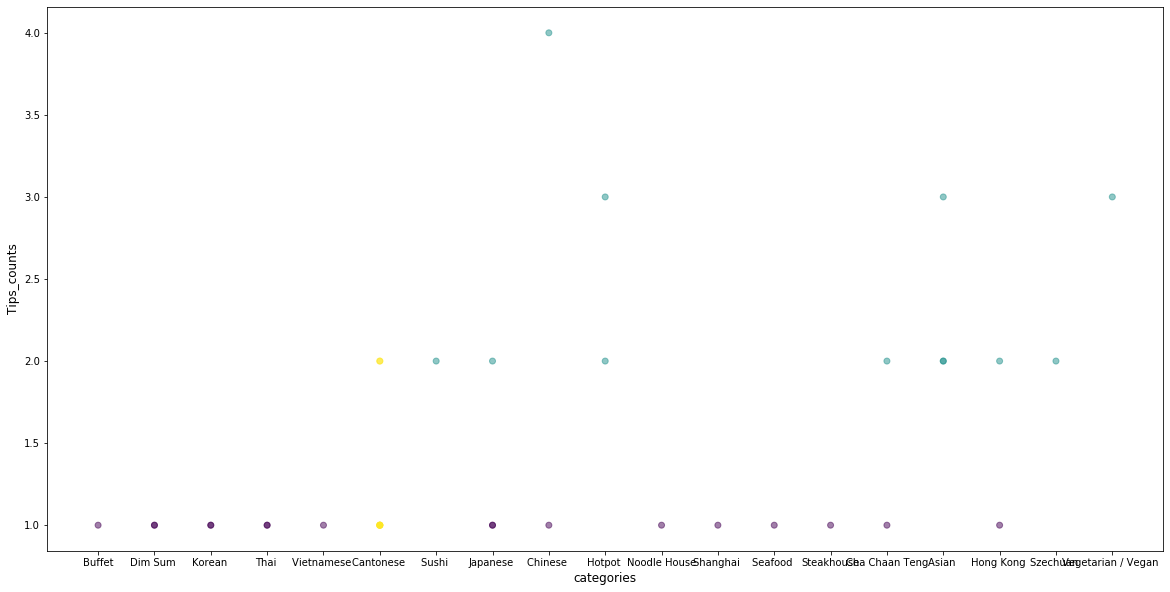

In [97]:
plt.figure(figsize=(20,10))
plt.scatter(df_restaurant_in_kt_clusters.iloc[:, 5], df_restaurant_in_kt_clusters.iloc[:, 7], c=df_restaurant_in_kt_clusters['Cluster_kmeans'], alpha=0.5)
plt.xlabel('categories', fontsize=12)
plt.ylabel('Tips_counts', fontsize=12)

plt.show()

**Conclusion**

According to the data insight and result from Kmean model, we can draw the following conclusions which shall answer Jame's questions i.e Location and type of his restaurant

1. The restaurant shall be located in Kwun Tong District in which has the 2nd highest population and 1st highest population density
2. Town of Kwun Tong is surrounded by both residential and commercial buildings which are good supply of crowds hence it is helpful to increase popularity i.e tips count
3. Among all categories of restaurant, Asian/Chinese/Hotpot restaurants tends to draw more attention than other restaurants with specfic type of cuisine such as Cantonese restaurant or Japansese restaurant or Thai restaurant etc. Perhaps the like of people is the wide range of variety of food in menu